In [1]:
#sklearn is a machine learning package, it has a few sample datasets in it, so we'll use it here
from sklearn import datasets
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import seaborn as sns

## Basic Histograms

><b>Originally Created by Akeem Semper: [https://github.com/AkeemSemper/Basic_Stats_in_Python_Student_Workbooks](https://github.com/AkeemSemper/Basic_Stats_in_Python_Student_Workbooks "Original Repository")</b>

Histograms are one of the most basic and useful visualizations that we use in statistics. It allows us to clearly visualize the distribution of a variable - what values our variable can take on. 

A histogram is a very simple bar chart, one that always has a couple of features:
<ul>
<li> The value we are looking at is along the X axis. If it is a continuous value (e.g. height, weight, salary), the value is "binned" or broken into segments - i.e. for weight you may have 10kg bins, and every value between 80kg and 90kg are in one bar. 
<li> The count of how many times that value occurs (# of instances or records in the dataset) is on the Y axis. 
</ul>

So, a histogram is just a chart of a count of "how many records have this value".

![Histogram](images/histogram.png "Histogram")

A histogram is useful, and very commonly used, because it allows us to easily and quickly get an idea of the shape of our data. 

## Distributions

A distribution is a way of describing how the values of a variable are spread out. A histogram is a way of visualizing that distribution. In a numeric dataset, we have data that spans the range, or sits between the minimum and maximum values. How many values sit in each place along that range defines the distribution. For example, if we have a dataset of people's ages, we can see how many people are in each age group. If we have a lot of people in their 20s, but very few in their 60s, we can see that the distribution is skewed towards younger ages.

The easiest way to understand distributions is to look it visually, typically with a histogram. Any dataset will have some distribution of its values, many set of data will fall into one of several common distributions. The most common distributions are:
<ul>
<li> Normal Distribution - a bell-shaped curve where most values are around the mean, with fewer values as you move away from the mean in either direction. </li>
<li> Uniform Distribution - all values are equally likely, so the histogram is flat. </li>
<li> Skewed Distribution - the values are not evenly distributed, with more values on one side of the mean than the other. </li>
<li> Bimodal Distribution - two peaks in the distribution, indicating two different groups of values. </li>
<li> Exponential Distribution - values decrease rapidly, with most values close to the maximum and very few values as you move away from the maximum. </li>
</ul>

The normal distribution is the most common distribution, and many statistical tests assume that the data is normally distributed. In fact, knowing the distribution of your data can allow use to use tools based on the properties of that distribution. For example, if we know that our data is normally distributed, we can use the mean and standard deviation to calculate probabilities and confidence intervals. This is particularly useful in 'classical' statistics, since it enables calculations without needing to do massive amounts of computation.

### Load Data 

We'll load in one of the sample datasets from a package called scikitlearn. 
The loading part below, to get it into a dataframe is something that you can just Google - "load sklearn boston dataset python". We'll use sklearn a lot later on into the machine learning class. 

All of the variables in this data are metrics of housing quality - things like polution measures, tax levels, age of homes, etc... We can also Google for a detailed dictionary as this is a common example dataset, we don't really need much specific knowledge on the meaning of the data examine the stats!

In [2]:
#tmp = datasets.load_boston()
#df = pd.DataFrame(tmp['data'], columns=tmp.feature_names)
#df.head()
filepath = "data/HousingData.csv"
df = pd.read_csv(filepath)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


We'll look at the number of rooms first... (Remember, this is per neighborhood, so we get an average number of rooms in a set of houses). 

In [3]:
df["RM"].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [4]:
df["RM"].value_counts().sort_index()

3.561    1
3.863    1
4.138    2
4.368    1
4.519    1
        ..
8.375    1
8.398    1
8.704    1
8.725    1
8.780    1
Name: RM, Length: 446, dtype: int64

### Histograms to Visualize Distribution

This sucks to look at. There has to be a better way!!

![Falling](images/couch_better_way.gif)

The thinkstats package gives us a shortcut function to generate a histogram. We first create a "hist" object that is a data structure defined by thinkstats to hold distribution data - it is a souped up dictionary (you'll do that in more detail in the programming class). Once we have made the hist object, we can call a function to draw it. 

##### Generating Hist Objects

The first step is to create an object to store the histogram data. This is basically a souped up dictionary. 

The round is an example of a statistical technique called binning - we are grouping all the values that are between 3.0 and 3.9999 into one "bin", all the "4s", in another, etc... Because we are looking at a continuous variable with a discreet tool (a histogram), this binning process does that translation. The size of the bins is a judgement call. Printing a list of all the values after this binning makes it much more digestable. 

In [5]:
#hist = thinkstats2.Hist(np.floor(df["RM"]), label='Rooms')
hist = thinkstats2.Hist(round(df["RM"],1), label='Rooms')
hist

Hist({5.9: 47, 6.0: 42, 6.2: 42, 6.4: 39, 6.1: 37, 6.3: 27, 6.5: 26, 6.6: 24, 5.8: 21, 5.6: 20, 5.7: 18, 6.8: 17, 6.7: 16, 7.0: 16, 5.4: 10, 7.2: 10, 6.9: 10, 7.1: 8, 5.5: 7, 5.0: 7, 7.3: 6, 5.3: 6, 7.8: 5, 7.4: 5, 7.9: 4, 8.3: 4, 4.9: 4, 7.5: 4, 8.4: 2, 4.1: 2, 5.2: 2, 7.6: 2, 8.0: 2, 8.7: 2, 7.7: 2, 4.5: 1, 4.6: 1, 4.7: 1, 4.4: 1, 8.8: 1, 3.9: 1, 3.6: 1, 8.2: 1, 8.1: 1, 5.1: 1}, 'Rooms')

##### Drawing Histogram

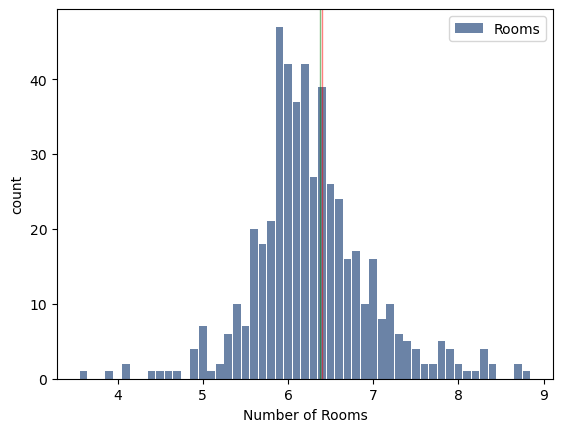

In [6]:
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Rooms', ylabel='count')
thinkplot.axvline(np.mean(hist), color="green")
thinkplot.axvline(np.median(hist), color="red")

#### Using Seaborn

We can also make histograms direrctly in seaborn, sans 'hist' object. 

<Axes: xlabel='RM', ylabel='Count'>

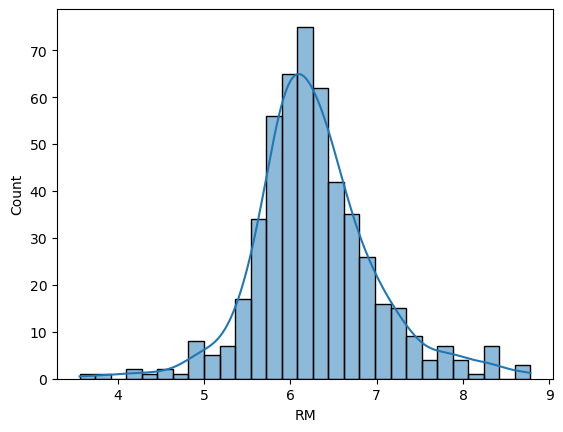

In [7]:
sns.histplot(df["RM"], kde=True)

#### Histograms and Basic Stats

Histograms are very useful for gaining a basic understanding of our data, in several ways:
<ul>
<li> "Shape" of the data, or its distribution. 
<li> Basic Statistics - mean and median can be estimated (they are shown by vertical lines above)
<li> Dispersion - is the data spread out or compacted (measured by varaiance and standard deviation)
<li> Outliers - is anything really big or really small. 
</ul>

Most critically, we can generally see what type of pattern our data follows just by looking at it in a histogram. Our data here fits a common pattern, it is (roughly) normally distributed - meaning that it's distribution is more or less a bell shape, with most records in the middle, and fewer and fewer as we move progressively farther from the mean. 

This visual inspection of our data in a histogram (or a similar visualization) is one of the most common things that we will do with data. 

#### Simple Stats

We can also generate the basic statistics for the data

In [8]:
# Variance
print(df["RM"].var())
# Standard deviation 
print(df["RM"].std())
# Mean 
print(df["RM"].mean())
# Median 
print(df["RM"].median())

0.4936708502211095
0.7026171434153237
6.284634387351779
6.2085


#### Try It

With the "tax" value, generate a histogram as well as the basic statistics. Look at the distribution and see if it presents anything that you can understand in "real life" - is there anything you can think of that may help to resolve it so you can analyze the data better? If so, give it a shot. 

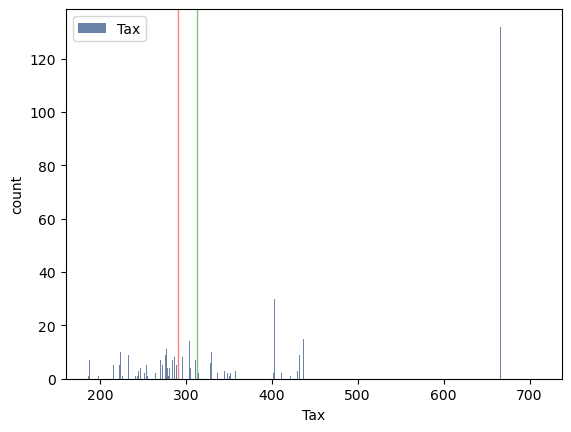

In [9]:
tax_hist = thinkstats2.Hist(round(df["TAX"],1), label='Tax')
thinkplot.Hist(tax_hist)
thinkplot.Config(xlabel='Tax', ylabel='count')
thinkplot.axvline(np.mean(tax_hist), color="green")
thinkplot.axvline(np.median(tax_hist), color="red")

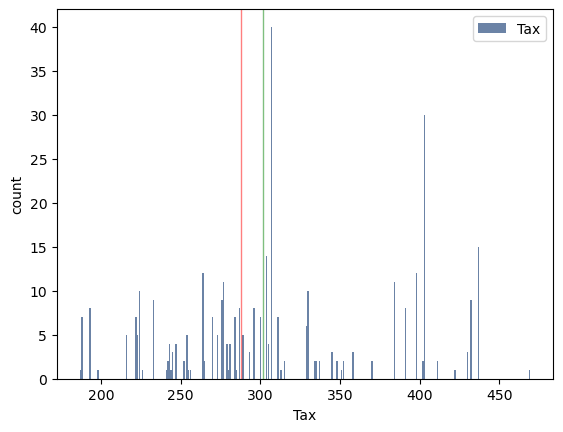

In [10]:
temp = df[df["TAX"] < 500]
tax_hist = thinkstats2.Hist(round(temp["TAX"],1), label='Tax')

thinkplot.Hist(tax_hist)
thinkplot.Config(xlabel='Tax', ylabel='count')
thinkplot.axvline(np.mean(tax_hist), color="green")
thinkplot.axvline(np.median(tax_hist), color="red")

## Spliting Samples

A very common type of analysis that we want to do is based on looking at two or more subsets in our dataset. For example, we may want to compare the lifetime earnings between people with high school vs college vs university vs graduate degreees. In a medical study we want to see how many vaccinated people get die vs how many unvaccinated people die. Comparisons of groups, and evaluating if there is a significant difference in what we see in the data between the different groups, is very common and important. 

#### Are homes by the river bigger?

First, we can take a look at how the two different sets of houses (river vs no river) are distributed. The first step is to split the data using the varaible that tells us if we are by the river. 

In [11]:
river = df[df["CHAS"] ==1 ]
noRiver = df[df["CHAS"] != 1]

In [12]:
riverHist = thinkstats2.Hist(np.floor(river["RM"]), label="Riverside")
landHist = thinkstats2.Hist(np.floor(noRiver["RM"]), label="Landlocked")

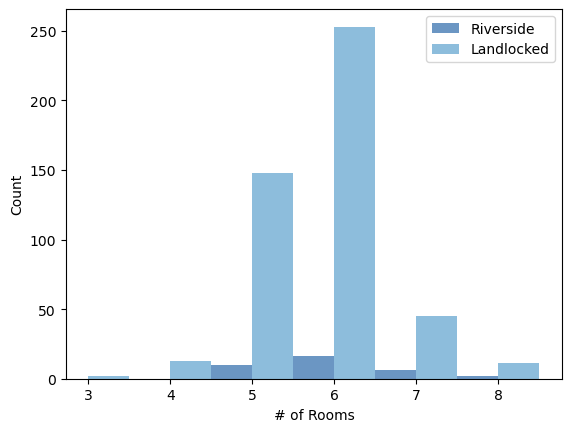

In [13]:
width = 0.5
thinkplot.PrePlot(2)
thinkplot.Hist(riverHist, align='right', width=width)
thinkplot.Hist(landHist, align='left', width=width)
thinkplot.Config(xlabel='# of Rooms', ylabel='Count')

Maybe not the most clear picture, but we get the idea. What can we gather from this?

In [14]:
print(river["RM"].describe())
print(noRiver["RM"].describe())

count    34.000000
mean      6.563941
std       0.848811
min       5.344000
25%       5.953250
50%       6.311500
75%       6.933000
max       8.780000
Name: RM, dtype: float64
count    472.000000
mean       6.264515
std        0.687598
min        3.561000
25%        5.879750
50%        6.198500
75%        6.593500
max        8.725000
Name: RM, dtype: float64


In [15]:
river["RM"].mean() - noRiver["RM"].mean()

0.2994263459621136

#### They look different, but... 

Here we have two subsets, there is a difference in their means, but there is a bunch of other info that is confusing things. The number of homes in each group is very different; the shape of the distribution isn't very easy to compare when the two are graphed together. 

Luckily we have other tools we can use to evaluate if this difference is significant. One that we will regularly use is called the effect size. 

### Evaluating Differences in Subgroups

One thing we can see is that different subgroups may have different distributions - this is a common and important thing that we may want to investigate. For example, do people who take a medicince have a longer lifespan than people who take a placebo. Examining this difference and its importance is a big topic, one thing that we can look at now is called the Effect Size - a measure of how substantial the difference between two groups is. 

This is a very useful thing to be able to do - if you are examining the death rate of people who got a treatment vs people who didn't, a statistic like "the non-treated population dies at a rate .087 higher than the treated population" doesn't communicate anything substantial unless we can establish if that difference has substantial meaning.

In [16]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [17]:
CohenEffectSize(river["RM"], noRiver["RM"])

0.42799921568515753

#### Effect Size... Sizes

Effect size values can be judged on a scale, the higher the number, the larger the difference. Or in "effect" terms - if we see a big effect size, that is an indication that whatever the differentiator between the two samples is (e.g. often something like one group took a drug, the other took a placebo) significant, or it had an effect. 

There aren't really exact cutoffs for "big" or "small" in effect size, a rough guideline is:
<ul>
<li> < 0.3 - small effect size. 
<li> 0.3 - 0.5 - medium effect size. 
<li> > 0.5 - large effect size
</ul>

Again, these cutoffs are not exact; we will look at determining if there is a significant difference in two samples in more depth in a few weeks. 

We can also visualize the effect sizes via a graph:

![Effect Size](images/effect_size_chart.jpg)

#### Try It

Use the "CRIM" column to separate the dataset into greater and lesser than .05, then do a similar comparison to above - which subset has more rooms? Include histogram(s) to illustrate the two distributions. 

In [18]:
low = df[df["CRIM"] <= .05 ]
high = df[df["CRIM"] > .05]

In [19]:
lowHist = thinkstats2.Hist(np.floor(low["RM"]), label="Riverside")
highHist = thinkstats2.Hist(np.floor(high["RM"]), label="Landlocked")

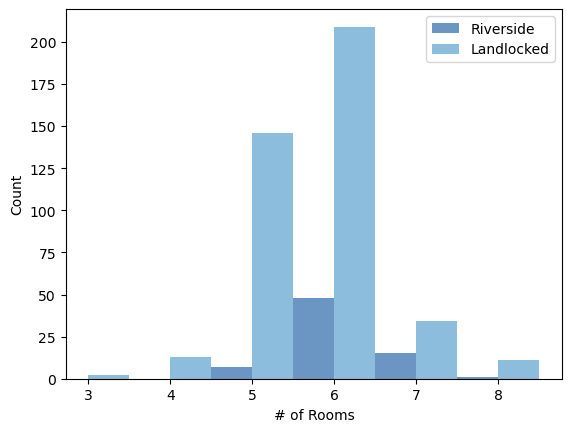

In [20]:
width = 0.5
thinkplot.PrePlot(2)
thinkplot.Hist(lowHist, align='right', width=width)
thinkplot.Hist(highHist, align='left', width=width)
thinkplot.Config(xlabel='# of Rooms', ylabel='Count')

In [21]:
print(low["RM"].describe())
print(high["RM"].describe())

count    71.000000
mean      6.627493
std       0.561456
min       5.663000
25%       6.188000
50%       6.575000
75%       6.971500
max       8.034000
Name: RM, dtype: float64
count    415.000000
mean       6.214540
std        0.709692
min        3.561000
25%        5.855000
50%        6.145000
75%        6.492500
max        8.780000
Name: RM, dtype: float64


## Graphing and Plotting Notes

In general, we'll use the thinkplot package to do our plotting initially. It is a very simple package that is built on top of the matplotlib package, which is the most common plotting package in Python, and it works pretty easily for the stats things that we will do.

Later on, we will use the seaborn package, which is a more advanced plotting package that is also built on top of matplotlib. Seaborn is a full, general purpose, plotting library that can do many things, and works with most other packages. 

On the whole, these two approaches are pretty interchangeable, we don't care a lot about the details of the plotting, we just want to be able to visualize our data. If you feel super strongly about one or the other, or even some other plotting package, feel free to use it. The goal is to visualize, we don't care how we get there - the current approach of thinkplot/seaborn is relatively simple and easy to use. 